In [1]:
#Three main layer (input layer-CN/Dense layer/Convoluted layer,hidden layer-NN,output layer-FCNN)
#Besides these need some supporting layer(Relu layer,Pooling layer-major layer,some optional layer-Batch normalization,Dropout,Upsampling we can use it instead of Pooling layer if the dataset is large enough.
#1.input layer --CNN/Dense layer/Convoluted layer(passing feature in the layer)
#i.Relu layer
#ii.Pooling layer(we can use Batch normalization and Dropout after pooling layer if we want.)
#we can use Upsampling instead of pooling layer if the dataset is bigger.
#i.Batch normalization
#ii.Dropout
#2.Hidden layer--NN(Neural Network)
#3.Output layer-FCNN(Fully Connected Neural Network)

In [2]:
#Required module
#Tensorflow
#MaxNet(Combination of Tensorflow and Pytorch)
#Numpy
#Pandas
#Pillow
#Opencv
#Scikit learn
#i.Plotly
#ii.Matplotlib
#iii.Seaborn
#iv.D3.js(Dynamic visualization using java script)
#NLTK(Natural Language Tools Kit)

Import Required Libraries

In [3]:
import tensorflow as tf           #Section for model
import numpy as np                #for algebric analysis
import matplotlib.pyplot as plt   #for visualization
import warnings
warnings.filterwarnings('ignore')  #for avoid warnings
%matplotlib inline                

Initializing Weight and Bias

In [4]:
class NeuralNetwork:
    def __init__(self,layers):
        #instance variables(value initialization)
        
        
    
        #instance variables(value initialization)
        self.layers=layers                                                          #creates layer
        self.total_layers=len(layers)                                              #total number of layers
        self.number_feature=layers[0]                                              #total number of feature for 0 index.(feature of feature like data of data-metadata.)
        self.number_class=layers[-1]
        self.w={}                                                                  #weight of per node in a layer(input time ,random weight value assigning as per feature and classes.)
        self.b={}                                                                  #bias of per node in a layer(input time,random bias value assigning as per classes.)
        self.dw={}                                                                 #derivatives of weights(multiplication of input and weight,output time random weight value assigning as per feature and classes)
        self.db={}                                                                 #derivatives of bias(output time random bias value assigning as per classes)
        #set up function
        self.setup()
        
    def setup(self):


        for i in range(self.total_layers):

            self.w[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

             

Forward Propagation

In [5]:
class NeuralNetwork(NeuralNetwork):      #inheritance
    def forwardpass(self,A):
        A=tf.convert_to_tensor(A,dtype=tf.float32)     #array data for tensor
        for i in range(1,self.total_layers):
            Z=tf.matmul(A,tf.transpose(self.w[i]))+tf.transpose(self.b[i])  #update feature value with weight and bias
            if i!=self.total_layers-1:
                A=tf.nn.relu(Z)                                             #output data with activation function
            else:
                A=Z
        return A                                                       #feature conclusion value for aftermath.
                
            
      
        
    

Back Propagation

In [6]:
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self,A,Y):
        
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y,A) ) #for optimazation(fixing error after feature conclusion value with actual value)
                                                                             #it will return a tensor value.                    
    def upgrade_parameters(self,lr):
        for j in range(1,self.total_layers):
                              
                              
            self.w[j].assign_sub(lr *self.dw[j])                              #update weight as per learning rate with multiplication output weight.
            self.b[j].assign_sub(lr *self.db[j])                              #update bias as per learning rate with multiplication output bias.
        
                              
                              
                              
    

Predict and Neural Network Information

In [7]:
class NeuralNetwork(NeuralNetwork):
    def predict(self,x):                                                    # x is an input.  
        A=self.forwardpass(x)                                                #feature value process with relu activation function.                             
        return tf.argmax(tf.nn.softmax(A),axis=1)                           #final process with relu activation function.
    def info(self):
        num_params=0                                                       #count number of parameter
        for i in range(1,self.total_layers):
            num_params+=self.w[i].shape[0] * self.w[i].shape[1]
            num_params+=self.b[i].shape[0]
        print("Number of Feature:{}".format(self.number_feature))
        print("Total Number of Class is :{}".format(self.number_class))
        print("Hidden Layer information is: ")
        for j in range(1,self.total_layers-1):
            print("Layer:{},Units {}".format(j,self.layers[j]))
        print("Total Number of Parameters:{}".format(num_params))
        
        

In [8]:
class NeuralNetwork(NeuralNetwork):
    def training_on_batch(self,x,y,lr):
        x=tf.convert_to_tensor(x,dtype=tf.float32)
        y=tf.convert_to_tensor(y,dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A=self.forwardpass(x)
            loss=self.compute_loss(A,y)
            for key in self.w.keys():
                self.dw[key]=tape.gradient(loss,self.w[key])
                self.db[key]=tape.gradient(loss,self.b[key])
                
                
            del tape
            self.upgrade_parameters(lr)
            return loss.numpy()
            
            

        

In [9]:
#Training session
class NeuralNetwork(NeuralNetwork):
    def train(self,x_train,y_train,x_test,y_test,epochs,step_per_epochs,batch_size,lr):
        history={'val_loss':[],
                 'train_loss':[],
                 'val_acc':[]}      #create a dictionary
        for e in range(0,epochs):#loop for number of epochs
            epoch_loss_train=0.0
        
            print("Epochs {}".format(e), end="|")
            for i in range(step_per_epochs):      #loop for step per epochs
                x_batch=x_train[i*batch_size:(i+1)*batch_size]    #between i and i+1
                y_batch=y_train[i*batch_size:(i+1)*batch_size]
                batch_loss=self.training_on_batch(x_batch,y_batch,lr)  #per batch loss
                epoch_loss_train+=batch_loss        #epoch_loss_train=epoch_loss_train+batch_loss.
                                                    #loss for epoch not for step_per_epochs.
                                                    #after completing for loop then this line.
                if i%int(step_per_epochs/10)==0:    #instead of int we can use '//'
                    print(end='.')
            history['train_loss'].append(epoch_loss_train/step_per_epochs)
            valA=self.forwardpass(x_test)
            history['val_loss'].append(self.compute_loss(y_test,valA).numpy())  #in case of loss we just pass the but for value loss we have to compute.
                                                               # ytest(actual value),valA(after forward propagation -predicted value)=(Y,A)
                                                               #compute_loss tensor vale converted to numpy array otherwise it will not accepted.
            valePr=self.predict(x_test)    #valePr->predicted value
            history['val_acc'].append(np.mean(np.argmax(y_test,axis=1)==valePr.numpy()))  #argmax() -> return maximum index ,compare between ytest's maximum index with valuePr and then take the mean of that value in a numpy array.
            print("Value Accuracy:",history['val_acc'][-1])
        #here we will get training information
        return history
        
                        
    

In [10]:
def loadDatasets():
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    x_train=np.reshape(x_train,(x_train.shape[0],784))/255.0
    y_train=tf.keras.utils.to_categorical(y_train)
    x_test=np.reshape(x_test,(x_test.shape[0],784))/255.0
    y_test=tf.keras.utils.to_categorical(y_test)
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y Test Data{}".format(y_test))
    print("Length of Y test Datasets:{}".format(len(y_test[0])))
    print("Unique value is :{}".format(np.unique(y_test[0])))
    print("Unique value is :{}".format(np.argmax(y_test[2])))
    return (x_train,y_train),(x_test,y_test)

def plot_random_sample(x,y,p=None):
    indicies=np.random.choice(range(0,x.shape[0]),10)
    y=np.argmax(y,axis=1)
    if p is None:
        p=y
    plt.figure(figsize=(10,4))
    for i ,index in enumerate(indicies):
        plt.subplot(2,5,i+1)
        plt.imshow(x[index].reshape((28,28)),cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index]==p[index]:
            col='g'
        else:
            col='r'
        plt.xlabel(str(p[index]),color=col)
    return plt

                              

In [11]:
(x_train,y_train),(x_test,y_test)=loadDatasets()

X Train Datasets Shape: (60000, 784)
Y Test Data[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Length of Y test Datasets:10
Unique value is :[0. 1.]
Unique value is :1


Visualization

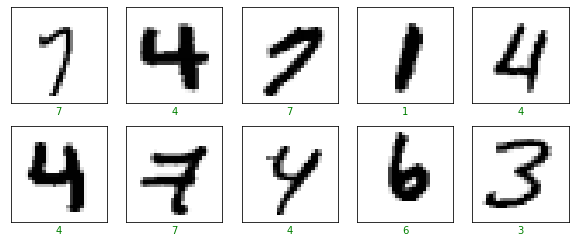

In [12]:
#Random Sample of MNIST data
plot_random_sample(x_train,y_train).show()

In [20]:
def plot_results(history):
    plt.figure(figsize=(12,4))
    epochs=len(history['val_loss'])
    plt.subplot(1,2,1)
    plt.plot(range(epochs),history['val_loss'],label='Val_Loss')
    plt.plot(range(epochs),history['train_loss'],label='Train_Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    
    plt.subplot(1,2 ,2)
    plt.plot(range(epochs),history['val_acc'],label='Val_Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [14]:
network=NeuralNetwork([784,256,256,10])

In [15]:
network.info()

Number of Feature:784
Total Number of Class is :10
Hidden Layer information is: 
Layer:1,Units 256
Layer:2,Units 256
Total Number of Parameters:269322


In [16]:
batch_size=128
epochs=20
step_per_epochs=int(x_train.shape[0]/batch_size)

In [17]:
learning_rate=1e-3

In [18]:
history=network.train(x_train,y_train,x_test,y_test,epochs,step_per_epochs,batch_size,learning_rate)

Epochs 0|WARNING:tensorflow:Calling GradientTape.gradient on a persistent tape inside its context is significantly less efficient than calling it outside the context (it causes the gradient ops to be recorded on the tape, leading to increased CPU and memory usage). Only call GradientTape.gradient inside the context if you actually want to trace the gradient in order to compute higher order derivatives.
...........Value Accuracy: 0.8005
Epochs 1|...........Value Accuracy: 0.8388
Epochs 2|...........Value Accuracy: 0.857
Epochs 3|...........Value Accuracy: 0.8683
Epochs 4|...........Value Accuracy: 0.8751
Epochs 5|...........Value Accuracy: 0.8812
Epochs 6|...........Value Accuracy: 0.8863
Epochs 7|...........Value Accuracy: 0.8885
Epochs 8|...........Value Accuracy: 0.8903
Epochs 9|...........Value Accuracy: 0.8941
Epochs 10|...........Value Accuracy: 0.897
Epochs 11|...........Value Accuracy: 0.8992
Epochs 12|...........Value Accuracy: 0.9021
Epochs 13|...........Value Accuracy: 0.9036

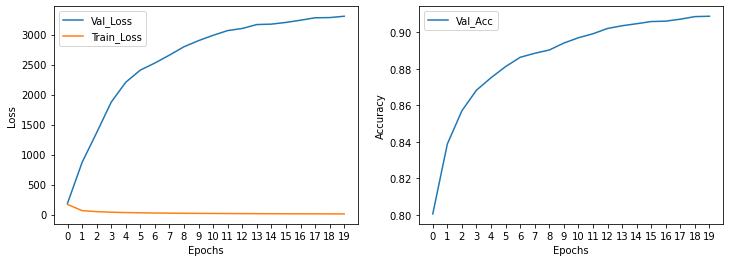

In [21]:
#Results for Val_loss,Train_loss,Val_acc 

plot_results(history).show()

In [22]:
preds=network.predict(x_test)

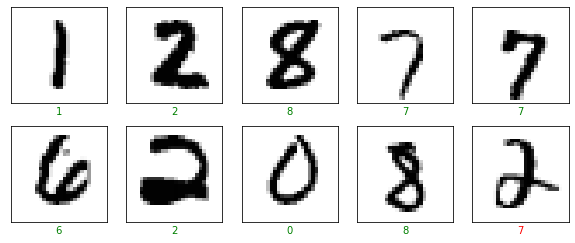

In [23]:
#Model Predicted Sample
plot_random_sample(x_test,y_test,preds.numpy()).show()

Thanks for reading!Please feel free to provide suggestions or feedbacks.